# Investigating Fandango Movie Ratings
Daniel Torres
3/22/20
## Introduction
### About

This is a project guided by dataquest.io for a course on sampling, variables, scales of measurement, and frequency distributions. I hope to demonstrate my python skills through an investigation of fandango movie ratings.

The previous work done on this subject can be found here at https://fivethirtyeight.com/features/fandango-movies-ratings/

Essentially, a data journalist, Walt Hickey, found that Fandango's average ratings seemed to be rounded up from the ratings users gave. 

### Goal

I hope to continue this investigation here. Looking at more recent movie ratings data to see if Fandango has changed their system.

In [1]:
#reading in data
import pandas as pd

fandango_previous = pd.read_csv('fandango_score_comparison.csv')
fandango_after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
#isolating just the columns with info we need 
#for Hickey's Data we'll need  'FILM', 'Fandango_Stars', 
#'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'

#for Dataquests data we'll need 'movie', 'year', 'fandango'

fandango_previous = fandango_previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = fandango_after[['movie', 'year', 'fandango']]

In [3]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


# Understanding the Data

The population we're trying to understand is the **Fandango Ratings Averages For all Movies on the Site** 

From the README.md information on each data (https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md and https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) we can see that the data had certain criteria that makes it not representative or randomly sampled. 

For example in the fandango_previous a movie must:
- have had tickets on sale 
- have had at least 30 reviews on the site

The other dataset is similar.

# Changing our Goal

Original Goal: " determine whether there has been any change in Fandango's rating system after Hickey's analysis."

New Goal: " whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016"


Popular Definition: having 30+ fan ratings on Fandango's website

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.


In [5]:
fandango_after.sample(10, random_state= 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


By using a random sample and checking our results it seems that greater than 90% of our samples are *popular*

Let's check for our previous sample

In [6]:
sum(fandango_previous['Fandango_votes'] < 30)

0

In [7]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [8]:
fandango_previous['year'] = fandango_previous['FILM'].str[-5:-1]

In [9]:
fandango_previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [10]:
fandango_2015 = fandango_previous[fandango_previous['year'] == '2015'].copy()

In [11]:
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [12]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()

In [13]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016 Popular Movies

In [16]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

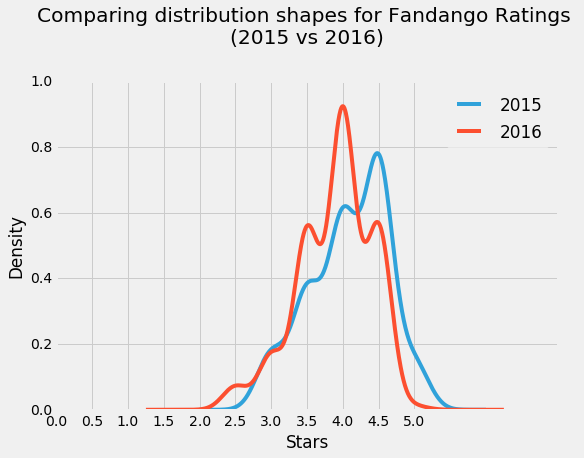

In [20]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title('Comparing distribution shapes for Fandango Ratings \n(2015 vs 2016)', y = 1.1)
plt.xticks(arange(0,5.1,0.5))
plt.xlabel('Stars')
plt.show()

The shapes are left skewed. 2015 is defenitely shifted right, indicating a that in 2016 movies were generally given lower ratings. 

# Comparing Relative Frequencies

Let's look at the relative frequencies by answering:

- Is it still clear that there is a difference between the distrubtions?
- What can we tell about the direction of the difference just from the tables?


In [21]:
print('2015\n' + '-'*16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() *100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [22]:
print('2016\n' + '-'*16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() *100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

It is clear that there is a differnce. It's slightly more difficult to tell that the diretion is down. 

It seems more that the direction is "in" toward the 4.0 rating. Seen by the relative percent 3.0/2.5 ratings going down, and 5.0 droping ~6%, and 3.5 droping 13% while the 4.0 rating goes to over 40% in 2016

# Determining the Direction of the Change

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [23]:
f15 = fandango_2015['Fandango_Stars']
f16 = fandango_2016['fandango']

In [37]:
f15mean = f15.mean()
f15median = f15.median()
f15mode = f15.mode()[0]

In [38]:
f16mean = f16.mean()
f16median = f16.median()
f16mode = f16.mode()[0]

In [39]:
print('2015\n' + '-'*16 +  '\nmean: {}\nmedian: {}\nmode: {}'.format(f15mean, f15median,f15mode))

2015
----------------
mean: 4.0852713178294575
median: 4.0
mode: 4.5


In [40]:
print('2016\n' + '-'*16 +  '\nmean: {}\nmedian: {}\nmode: {}'.format(f16mean, f16median,f16mode))

2016
----------------
mean: 3.887434554973822
median: 4.0
mode: 4.0


In [41]:
summary = pd.DataFrame()
summary['2015'] = [f15mean, f15median,f15mode]
summary['2016'] = [f16mean, f16median,f16mode]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


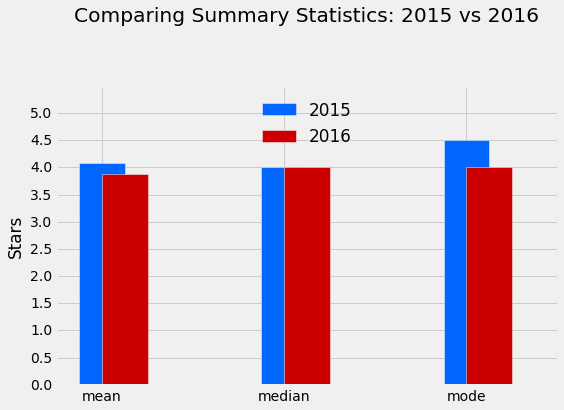

In [56]:
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))


plt.title('Comparing Summary Statistics: 2015 vs 2016', y =1.2)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

# Conclusion

We can conclude that there was a differnce in the 2015 vs 2016 ratings on fandango. We saw that in 2016 there was a drop in the mean and mode.